In [26]:
import pickle
with open('train.pkl','rb') as f:
    data = pickle.load(f)
# data

In [27]:
import numpy as np
from PIL import Image
image_data = []
for image in data['images']:
    image_data.append(np.array(image))
# image_data 

In [28]:
labels = data['labels']
# labels

In [29]:
import PIL
def display_images(images):
        img = Image.fromarray(images)
        display(img.resize((128,128),PIL.Image.LANCZOS))

##  Question1: Display 10 random images from each class

In [30]:
unique_labels = list(set(labels))
label_image_dict = {key:[] for key in unique_labels}

In [31]:
# for key in unique_labels:
    

In [32]:
labels_arr = np.array(labels)


In [33]:
labels[4936]

0

labels:0


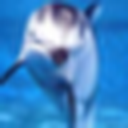

labels:0


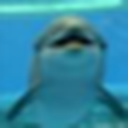

labels:0


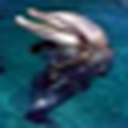

labels:1


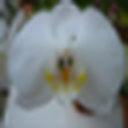

labels:2


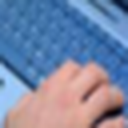

labels:2


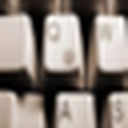

labels:2


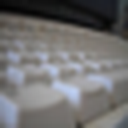

labels:2


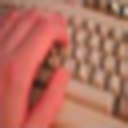

labels:2


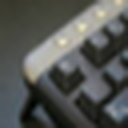

labels:3


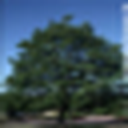

labels:3


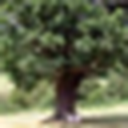

labels:3


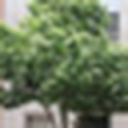

labels:3


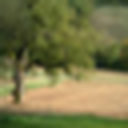

labels:3


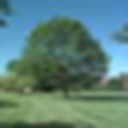

labels:3


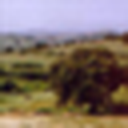

labels:3


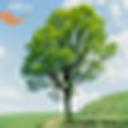

labels:4


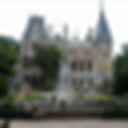

labels:4


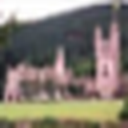

labels:4


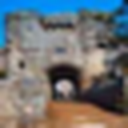

labels:5


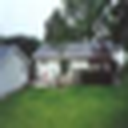

labels:6


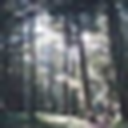

labels:6


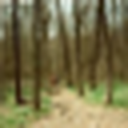

labels:6


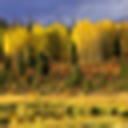

labels:6


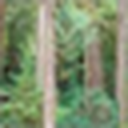

labels:6


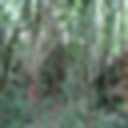

labels:6


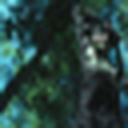

labels:6


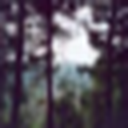

labels:6


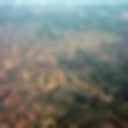

labels:6


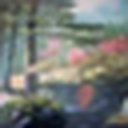

labels:8


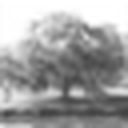

labels:8


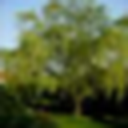

labels:8


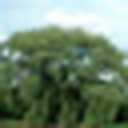

labels:8


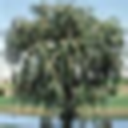

labels:8


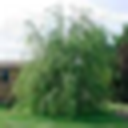

labels:8


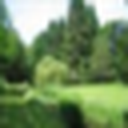

labels:9


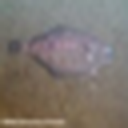

labels:9


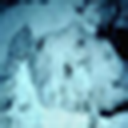

labels:9


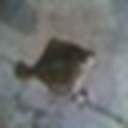

labels:9


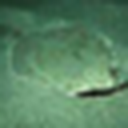

labels:9


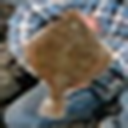

labels:9


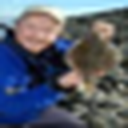

labels:9


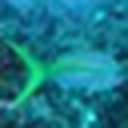

labels:9


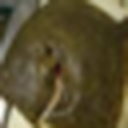

In [34]:
import random
for label in unique_labels:
    indices = np.where(labels_arr==label)[0]
    rand_indices = random.randint(0, 9)
    indices = indices[:rand_indices]
    for index in indices:
        print("labels:{}".format(label))
        display_images(image_data[index])

In [35]:
import torch.nn as nn

class VGG(nn.Module):
    def vgg_conv_layers(self,number_convolutions, input_channels, output_channels):
        conv_layers = []
        for convolutions in range(number_convolutions):
            conv_layers.append(nn.Conv2d(input_channels,output_channels,kernel_size=3,padding=1))
            conv_layers.append(nn.ReLU())
        return conv_layers
        
    def __init__(self, image, architecture):
        super(VGG, self).__init__()
        self.image = image
        self.blocks = []
            
        input_channels =self.image[0].shape[-1]
        for (number_convolutions, output_channels) in architecture:
            self.blocks.append(nn.Sequential(*self.vgg_conv_layers(number_convolutions, input_channels, output_channels)))
            input_channels = output_channels
            

        self.network = nn.Sequential(
            *self.blocks,
            nn.Flatten(),
            nn.Linear(output_channels*16*16, 4096),
            nn.ReLU(), 
            nn.Dropout(0.5),
            nn.Linear(4096, 4096), 
            nn.ReLU(), 
            nn.Dropout(0.5),
            nn.Linear(4096, 10)
        )
        



    def forward(self, x):
        x = self.network(x)
        return x
    

In [36]:
vgg_net = VGG(image_data, [(2,16)])

In [37]:
# vgg_net.to('cuda')